# Analysis on housing market evolution in DK, FI, SE and GR

This notebook extracts residential property price data, model estimated residential property valuation data, and household liabilities data from ECB's Statistical Data Warehouse and Eurostat using SDMX. Evolution of these series is plotted.


In [1]:
from pandasdmx import Request
from IPython.display import display_html
from IPython.display import display
import pandas as pd

In [2]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline; border:0px"')          
    display_html(html_str,raw=True)

In [3]:
# Define connection to ECB
ecb = Request('ECB')
cat_response = ecb.categoryscheme()

In [4]:
# Get RPV data
dsd_id = cat_response.dataflow.RPV.structure.id
refs = dict(references = 'all')
dsd_response = ecb.datastructure(resource_id = dsd_id, params = refs)
dsd = dsd_response.datastructure[dsd_id]
#display(dsd.dimensions.aslist())

data_response = Request('ecb_s').data(resource_id = 'RPV', key={'FREQ': ['Q'], 'REF_AREA': ['SE', 'FI', 'DK', 'GR'], 'RPP_SUFFIX': ['MB']}, dsd=dsd)
data = data_response.data
series_l = list(data.series)
set(s.key.ADJUSTMENT for s in data.series)
series = (s for s in data.series)
RPV = data_response.write(series)
display_side_by_side(RPV.head(5), RPV.tail(5))

FREQ 
 Q 
 
 
 REF_AREA 
 DK 
 FI 
 GR 
 SE 
 
 
 ADJUSTMENT 
 N 
 N 
 N 
 N 
 
 
 RPP_DWELLING 
 TD 
 ED 
 TF 
 TD 
 
 
 RPP_GEO_COV 
 00 
 00 
 00 
 00 
 
 
 RPP_SOURCE 
 3 
 3 
 3 
 3 
 
 
 RPP_SUFFIX 
 MB 
 MB 
 MB 
 MB 
 
 
 TIME_PERIOD 
 
 
 
 
 
 
 
 
 2007Q1 
 23.0 
 3.0 
 6.0 
 -12.0 
 
 
 2007Q2 
 25.0 
 3.0 
 3.0 
 -9.0 
 
 
 2007Q3 
 25.0 
 1.0 
 5.0 
 -8.0 
 
 
 2007Q4 
 22.0 
 0.0 
 3.0 
 -14.0 
 
 
 2008Q1 
 18.0 
 -1.0 
 0.0 
 -13.0 
 
 
 
 
 
 FREQ 
 Q 
 
 
 REF_AREA 
 DK 
 FI 
 GR 
 SE 
 
 
 ADJUSTMENT 
 N 
 N 
 N 
 N 
 
 
 RPP_DWELLING 
 TD 
 ED 
 TF 
 TD 
 
 
 RPP_GEO_COV 
 00 
 00 
 00 
 00 
 
 
 RPP_SOURCE 
 3 
 3 
 3 
 3 
 
 
 RPP_SUFFIX 
 MB 
 MB 
 MB 
 MB 
 
 
 TIME_PERIOD 
 
 
 
 
 
 
 
 
 2017Q1 
 -6.0 
 1.0 
 -9.0 
 26.0 
 
 
 2017Q2 
 -2.0 
 2.0 
 -10.0 
 26.0 
 
 
 2017Q3 
 -1.0 
 1.0 
 -10.0 
 25.0 
 
 
 2017Q4 
 -1.0 
 1.0 
 -10.0 
 23.0 
 
 
 2018Q1 
 2.0 
 0.0 
 -10.0 
 21.0

In [5]:
# Get RPP data (new and existing flats for Greece (TF), otherwise new and existing dwellings (TD))
dsd_id = cat_response.dataflow.RPP.structure.id
refs = dict(references = 'all')
dsd_response = ecb.datastructure(resource_id = dsd_id, params = refs)
dsd = dsd_response.datastructure[dsd_id]
#display(dsd.dimensions.aslist())
data_response = Request('ecb_s').data(resource_id = 'RPP',
                    key={'FREQ': ['Q'], 'REF_AREA': ['SE', 'FI', 'DK', 'GR'],'ADJUSTMENT': ['N'], 'RPP_DWELLING': ['TD', 'TF']},
                                      params = {'startPeriod': '2007'},dsd=dsd)
data = data_response.data
series_l = list(data.series)
set(s.key.ADJUSTMENT for s in data.series)
series = (s for s in data.series)
RPP = data_response.write(series)

# Drop extra columns
RPP = RPP.iloc[:, ((RPP.columns.get_level_values(1).isin(['DK','FI','SE'])) & (RPP.columns.get_level_values(3) == 'TD')) | 
                  ((RPP.columns.get_level_values(1).isin(['GR'])) & (RPP.columns.get_level_values(3) == 'TF')) & (RPP.columns.get_level_values(5) == '3') ]

display_side_by_side(RPP.head(5), RPP.tail(5))

FREQ 
 Q 
 
 
 REF_AREA 
 DK 
 FI 
 GR 
 SE 
 
 
 ADJUSTMENT 
 N 
 N 
 N 
 N 
 
 
 RPP_DWELLING 
 TD 
 TD 
 TF 
 TD 
 
 
 RPP_GEO_COV 
 00 
 00 
 00 
 00 
 
 
 RPP_SOURCE 
 4 
 4 
 3 
 4 
 
 
 RPP_SUFFIX 
 00 
 00 
 00 
 00 
 
 
 TIME_PERIOD 
 
 
 
 
 
 
 
 
 2007Q1 
 105.01 
 85.08 
 98.56 
 62.15 
 
 
 2007Q2 
 106.41 
 86.56 
 99.63 
 65.96 
 
 
 2007Q3 
 106.58 
 86.82 
 100.65 
 68.35 
 
 
 2007Q4 
 104.58 
 87.00 
 101.16 
 66.37 
 
 
 2008Q1 
 103.24 
 87.88 
 101.41 
 66.56 
 
 
 
 
 
 FREQ 
 Q 
 
 
 REF_AREA 
 DK 
 FI 
 GR 
 SE 
 
 
 ADJUSTMENT 
 N 
 N 
 N 
 N 
 
 
 RPP_DWELLING 
 TD 
 TD 
 TF 
 TD 
 
 
 RPP_GEO_COV 
 00 
 00 
 00 
 00 
 
 
 RPP_SOURCE 
 4 
 4 
 3 
 4 
 
 
 RPP_SUFFIX 
 00 
 00 
 00 
 00 
 
 
 TIME_PERIOD 
 
 
 
 
 
 
 
 
 2017Q1 
 106.61 
 101.75 
 59.02 
 113.95 
 
 
 2017Q2 
 110.47 
 102.68 
 59.05 
 116.15 
 
 
 2017Q3 
 110.98 
 102.05 
 58.82 
 117.76 
 
 
 2017Q4 
 109.30 
 101.56 
 59.08 
 114.44 
 
 
 2018Q1 
 112.83 
 101.69 
 58.89 
 113.49

In [6]:
# Household debt - loans, % of GDP (annual)
estat = Request('ESTAT')

# non-consolidated
resp = estat.data('tipspd15')
data = resp.data
series_l = list(data.series)
data = resp.write(s for s in resp.data.series if s.key.SECTOR == 'S14' and s.key.GEO in ['SE', 'FI', 'DK', 'EL'])

# consolidated
resp2 = estat.data('tipspd25')
data2 = resp2.data
series_l2 = list(data2.series)
data2 = resp2.write(s for s in resp2.data.series if s.key.SECTOR == 'S14' and s.key.GEO in ['SE', 'FI', 'DK', 'EL'])

# As we see, for households no difference bertween consolidated and non-consolidated
display_side_by_side(data.head(),data2.head())
debt = data2

FINPOS 
 LIAB 
 
 
 UNIT 
 PC_GDP 
 
 
 CO_NCO 
 NCO 
 
 
 SECTOR 
 S14 
 
 
 NA_ITEM 
 F4 
 
 
 GEO 
 DK 
 EL 
 FI 
 SE 
 
 
 FREQ 
 A 
 A 
 A 
 A 
 
 
 TIME_PERIOD 
 
 
 
 
 
 
 
 
 1995 
 77.3 
 5.6 
 33.9 
 43.9 
 
 
 1996 
 79.2 
 6.5 
 31.6 
 43.9 
 
 
 1997 
 82.1 
 7.2 
 29.7 
 44.4 
 
 
 1998 
 87.4 
 8.3 
 29.2 
 44.9 
 
 
 1999 
 86.7 
 9.8 
 30.8 
 46.2 
 
 
 
 
 
 FINPOS 
 LIAB 
 
 
 UNIT 
 PC_GDP 
 
 
 CO_NCO 
 CO 
 
 
 SECTOR 
 S14 
 
 
 NA_ITEM 
 F4 
 
 
 GEO 
 DK 
 EL 
 FI 
 SE 
 
 
 FREQ 
 A 
 A 
 A 
 A 
 
 
 TIME_PERIOD 
 
 
 
 
 
 
 
 
 1995 
 77.3 
 5.6 
 33.9 
 43.9 
 
 
 1996 
 79.2 
 6.5 
 31.6 
 43.9 
 
 
 1997 
 82.1 
 7.2 
 29.7 
 44.4 
 
 
 1998 
 87.4 
 8.3 
 29.2 
 44.9 
 
 
 1999 
 86.7 
 9.8 
 30.8 
 46.2

In [7]:
# Get debt also in nominal currency to see the numerator
resp2 = estat.data('tipspd26')
data2 = resp2.data
series_l2 = list(data2.series)
data2 = resp2.write(s for s in resp2.data.series if s.key.SECTOR == 'S14' and s.key.GEO in ['SE', 'FI', 'DK', 'EL'])
debt_alternative = data2
debt_alternative.head()


FINPOS            LIAB                             
UNIT           MIO_NAC                             
CO_NCO              CO                             
SECTOR             S14                             
NA_ITEM             F4                             
GEO                 DK       EL       FI         SE
FREQ                 A        A        A          A
TIME_PERIOD                                        
1995          801387.0   5226.4  33400.0   827284.0
1996          862111.0   6689.1  32229.0   847976.0
1997          940494.0   8277.1  32929.0   896571.0
1998         1036350.0  10364.0  35192.0   952007.0
1999         1076246.0  13121.7  39040.0  1033288.0

In [8]:
# Flatten multi-level columns in data frames and harmonize country names
combined = [RPP, RPV]
for dataset in combined:
    new_col_names = [b for a,b,c,d,e,f,g in dataset.columns.get_values()]
    dataset.columns = new_col_names    

new_col_names = [f for a,b,c,d,e,f,g in debt.columns.get_values()]
new_col_names = [w.replace('EL', 'GR') for w in new_col_names]
debt.columns = new_col_names
debt.columns.values.sort()
debt_alternative.columns = new_col_names
debt_alternative.columns.values.sort()

display_side_by_side(RPP.head(5),RPV.head(5), debt.head(5), debt_alternative.head(5))

,DK,FI,GR,SE
TIME_PERIOD,,,,
2007Q1,105.01,85.08,98.56,62.15
2007Q2,106.41,86.56,99.63,65.96
2007Q3,106.58,86.82,100.65,68.35
2007Q4,104.58,87.00,101.16,66.37
2008Q1,103.24,87.88,101.41,66.56
,DK,FI,GR,SE
TIME_PERIOD,,,,
2007Q1,23.0,3.0,6.0,-12.0
2007Q2,25.0,3.0,3.0,-9.0


In [9]:
# Upsample debt to quarterly frequency using linear interpolation and align start/end dates
debt = debt.resample('Q').interpolate('linear')
debt = debt[(debt.index >= '2007Q1') & (debt.index < '2017Q4')]
debt_alternative = debt_alternative.resample('Q').interpolate('linear')
debt_alternative = debt_alternative[(debt_alternative.index >= '2007Q1') & (debt_alternative.index < '2017Q4')]
RPV = RPV[(RPV.index >= '2007Q1') & (RPV.index < '2017Q4')]
RPP = RPP[(RPP.index >= '2007Q1') & (RPP.index < '2017Q4')]

display_side_by_side(RPP.head(5),RPV.head(5), debt.head(5), debt_alternative.head(5))
display_side_by_side(RPP.tail(10),RPV.tail(10), debt.tail(10), debt_alternative.tail(10))

,DK,FI,GR,SE
TIME_PERIOD,,,,
2007Q1,105.01,85.08,98.56,62.15
2007Q2,106.41,86.56,99.63,65.96
2007Q3,106.58,86.82,100.65,68.35
2007Q4,104.58,87.00,101.16,66.37
2008Q1,103.24,87.88,101.41,66.56
,DK,FI,GR,SE
TIME_PERIOD,,,,
2007Q1,23.0,3.0,6.0,-12.0
2007Q2,25.0,3.0,3.0,-9.0


,DK,FI,GR,SE
TIME_PERIOD,,,,
2015Q2,101.02,100.16,61.22,98.40
2015Q3,100.82,100.12,60.33,102.26
2015Q4,100.45,99.90,59.95,104.35
2016Q1,102.87,99.80,60.15,106.85
2016Q2,105.09,100.98,59.67,106.98
2016Q3,106.19,100.58,59.27,109.54
2016Q4,104.58,100.40,59.33,111.15
2017Q1,106.61,101.75,59.02,113.95
2017Q2,110.47,102.68,59.05,116.15


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.close('all')

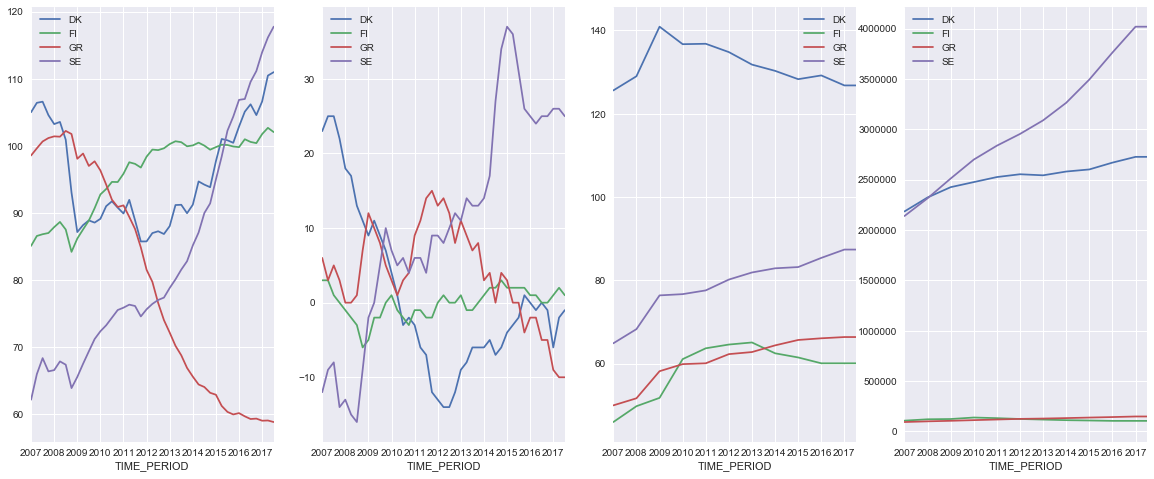

In [11]:
# Plot data frames
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))
RPP.plot(ax=axes[0])
RPV.plot(ax=axes[1])
debt.plot(ax=axes[2])
debt_alternative.plot(ax=axes[3])

In [12]:
# Re-index data so that both debt and prices start at 100
RPP_index = RPP.copy()
debt_index = debt.copy()
debt_alternative_index = debt_alternative.copy()

combined = [RPP_index, debt_index, debt_alternative_index]

for df in combined:
    df['type'] = 't1'
    for country in df.columns.values[:-1]:
        gg = df.groupby('type')[country].apply(lambda x: x.div(x.iloc[0]).subtract(1))
        df[country] = (1 + gg) * 100
    df.drop(['type'], axis = 1, inplace = True)


display_side_by_side(RPP_index.head(5),RPV.head(5),debt_index.head(5), debt_alternative_index.head(5))
display_side_by_side(RPP_index.tail(5),RPV.tail(5),debt_index.tail(5), debt_alternative_index.tail(5))

,DK,FI,GR,SE
TIME_PERIOD,,,,
2007Q1,100.000000,100.000000,100.000000,100.000000
2007Q2,101.333206,101.739539,101.085633,106.130330
2007Q3,101.495096,102.045134,102.120536,109.975865
2007Q4,99.590515,102.256700,102.637987,106.790024
2008Q1,98.314446,103.291020,102.891640,107.095736
,DK,FI,GR,SE
TIME_PERIOD,,,,
2007Q1,23.0,3.0,6.0,-12.0
2007Q2,25.0,3.0,3.0,-9.0


,DK,FI,GR,SE
TIME_PERIOD,,,,
2016Q3,101.123703,118.218148,60.135958,176.251006
2016Q4,99.590515,118.006582,60.196834,178.841512
2017Q1,101.523664,119.593324,59.882305,183.346742
2017Q2,105.199505,120.686413,59.912744,186.886565
2017Q3,105.685173,119.945933,59.679383,189.477072
,DK,FI,GR,SE
TIME_PERIOD,,,,
2016Q3,0.0,0.0,-5.0,25.0
2016Q4,-1.0,0.0,-5.0,25.0


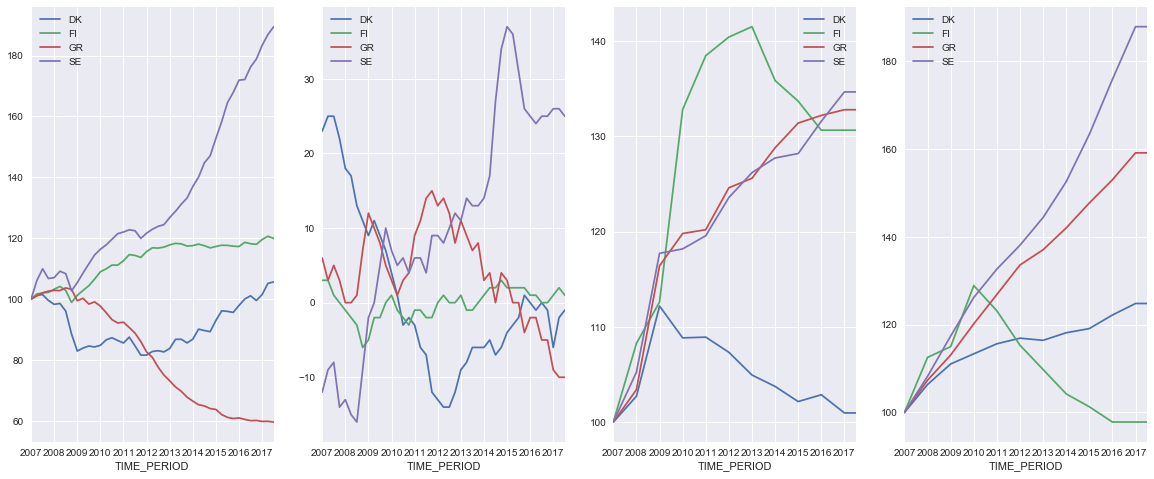

In [13]:
# Plot the data frames
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))
RPP_index.plot(ax=axes[0])
RPV.plot(ax=axes[1])
debt_index.plot(ax=axes[2])
debt_alternative_index.plot(ax=axes[3])

In [16]:
# Export data as json
#import collections
#import json
#
#RPP = RPP_index
#debt = debt_index
#
#def df_to_d3(df_in):
#    data = []
#    labels = df_in.columns
#    indices = df_in.index
#    for i in indices:
#        mydict = collections.OrderedDict()      
#        for l in labels:
#            mydict[l] = df_in[l][i]
#        data.append(mydict)
#    return data
#
#df = pd.concat([RPP, RPV, debt], axis = 1)
#df.columns = ['DK_RPP','FI_RPP','GR_RPP','SE_RPP','DK_RPV','FI_RPV','GR_RPV','SE_RPV','DK_debt','FI_debt','GR_debt','SE_debt']
#df['dates'] = df.index
#df['dates'] = df['dates'].astype(str)
#with open('data_export.json', 'w') as outfile:
#    json.dump(df_to_d3(df), outfile)